## 1. Ca Dynamics question from Introductory Computational Neuroscience course

In the case of the hill, the uniformly changing slope results in a uniformly increasing velocity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

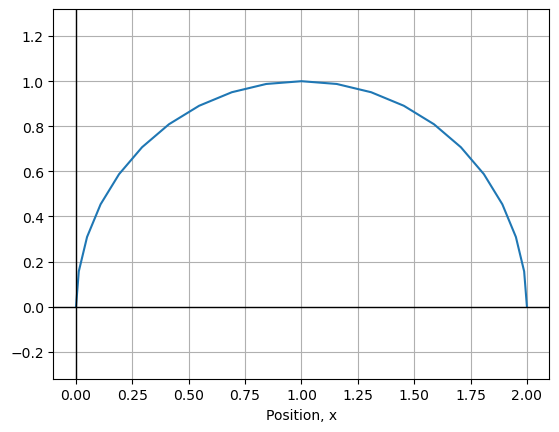

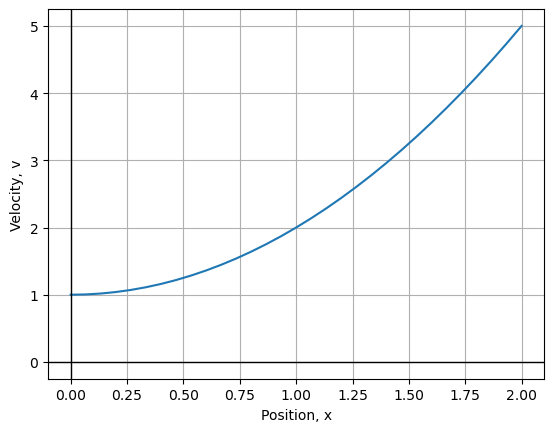

In [31]:
## Graph for hill
theta = np.linspace(0, np.pi, 21)
radius = 1
center = (1, 0)

x_values = center[0] + radius * np.cos(theta)
y_values = center[1] + radius * np.sin(theta)

plt.plot(x_values, y_values)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlabel('Position, x')
plt.grid(True)
plt.axis('equal')
plt.show()


## Graph for velocity using equation 1+x^2
def f(x):
    return 1+x**2

x = np.linspace(0, 2, 31)
y = f(x)
plt.plot(x, y)

plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlabel('Position, x')
plt.ylabel('Velocity, v')
plt.grid(True)
plt.show()

Similarly, unchanging slopes would result in linear velocities.

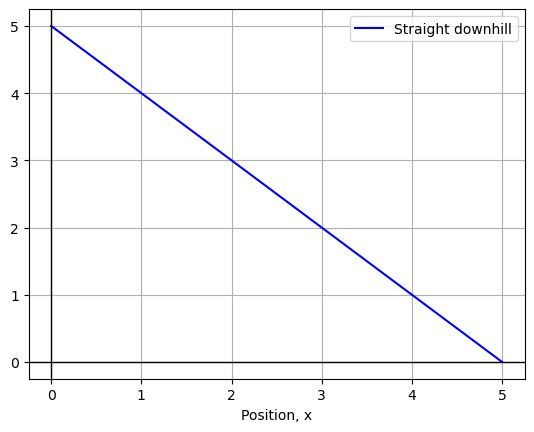

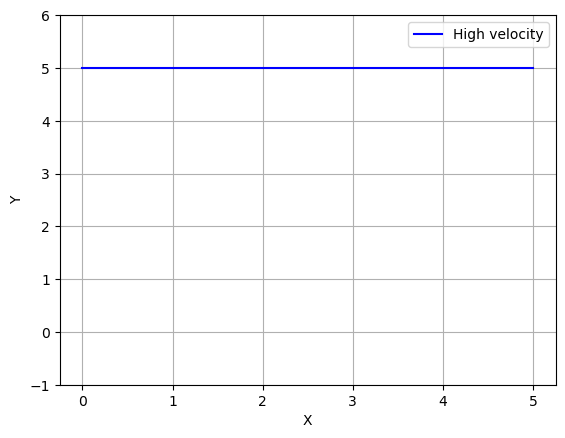

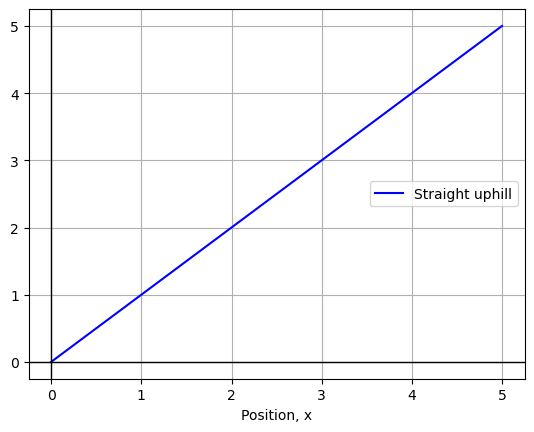

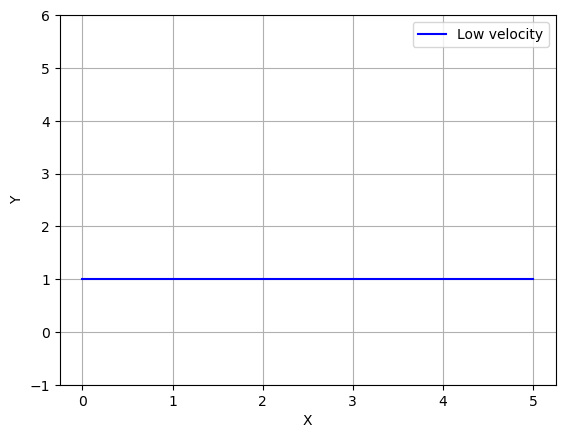

In [33]:


## Graph of straight uphill slope
x_values = [0, 5]
y_values = [5, 0]
plt.plot(x_values, y_values, color='blue', label='Straight downhill')

plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlabel('Position, x')
plt.grid(True)
plt.legend()
plt.show()

## Graph of velocity
x_values = [0, 5]
y_values = [5, 5]
plt.plot(x_values, y_values, color='blue', label='High velocity')
plt.ylim(-1, 6)

plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()

## Graph of straight downhill slope
x_values = [0, 5]
y_values = [0, 5]
plt.plot(x_values, y_values, color='blue', label='Straight uphill')

plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlabel('Position, x')
plt.grid(True)
plt.legend()
plt.show()

## Graph of velocity
x_values = [0, 5]
y_values = [1, 1]
plt.plot(x_values, y_values, color='blue', label='Low velocity')
plt.ylim(-1, 6)

plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()



Given that intracellular Ca++ concentration dynamics in brain cells are not uniform profile like the hill,
the resulting velocity changes will not be uniformly incremental velocity. However, I don’t know about
the actual Ca dynamics in the brain.

In example 4, a temperature equilibrium is reached as the heat extraction by AC from inside the house is equal to the heat leakage inside of the house from the outer environment. The rate of change of temperature is:

where K is the heat capacity,  is the minute change in temperature as time approaches 0, A is the rate of heat extraction by the AC, T_ext is the outside temperature, T is the inside temperature, and B is the leakiness of the house.
In the case of Ca, the concentration is much higher outside the cell. After the action potential is reached, the voltage-gated Ca channels open, and Ca comes inside the cell by facilitated diffusion to reach an equilibrium.
But the Ca gradient is required for further action potential, and it is restored later with active transport. To me, this process is comparable to maintaining a temperature gradient by the AC. Ac extracts heat from inside the house and releases it outside. But as heat leaks inside the house, the AC needs to run continuously to maintain the equilibrium.
Assuming no Ca can leak inside the cell through the membrane, after an equilibrium is reached, it should be maintained without continuous active transport. Similarly, if the house was completely insulated, the temperature change would’ve been:

until the desired temperature is reached. After that, the AC could shut down.

## Ca data

### Analysis

First I read the excel files in dataframes named negFB and posFB. I had to specify the file location, start row, end row, and columns of the raw data.

In [13]:
import pandas as pd

## Reading
# negFB
negFB_path = 'Ca_data/0001-C5 (-F) edit 2020-12-30-01a -DeID- Copy.xlsx'
negFB_start_row = 107
negFB_end_row = 317
negFB_num_rows = negFB_end_row - negFB_start_row
negFB_column_range = 'A:CC'

negFB = pd.read_excel(negFB_path, skiprows=negFB_start_row, nrows= negFB_num_rows, usecols=negFB_column_range, index_col=0)


# posFB
posFB_path = 'Ca_data/0002-C3 (+F)-edit 2021-01-15-01b - De-ID.xlsx'
posFB_start_row = 103
posFB_end_row = 314
posFB_num_rows = negFB_end_row - negFB_start_row
posFB_column_range = 'A:BY'

posFB = pd.read_excel(posFB_path, skiprows=posFB_start_row, nrows= posFB_num_rows, usecols=posFB_column_range, index_col=0)


Then, I normalized the two dataframes. Similar to the normalization method in the provided file, I divided all row values by the first row for every column. I stored the values in two new dataframes: negFB_normalized and posFB_normalized.

In [14]:
## Normalization
# negFB
negFB_normalized = pd.DataFrame([])
for column in negFB.columns[1:]:
    negFB_normalized[column] = negFB[column] / negFB[column].iloc[0]

# posFB
posFB_normalized = pd.DataFrame([])
for column in posFB.columns[1:]:
    posFB_normalized[column] = posFB[column] / posFB[column].iloc[0]


Then, I calculated percentage change for every column of the normalized dataframes. I stored the values in two new dataframes: negFB_pct_change and posFB_pct_change.

In [26]:
## percent change
# negFB
negFB_pct_change = negFB_normalized.pct_change()

# posFB
posFB_pct_change = posFB_normalized.pct_change()


Then, I defined a function for calculating rolling average. The inputs of the function are a dataframe and a rolling window for calculating rolling average.

In [16]:
def smooth(dataframe, window = 1):
    return dataframe.rolling(window).mean()


I also defined a function for plotting the data. The inputs of the function are a dataframe, a window for calculating rolling average (default window value is 1), and a title for the plot.

In [17]:
import matplotlib.pyplot as plt

def plot_data(data, window, title):
    plt.figure(figsize=(12, 6))
    
    data = smooth(data, window)
    
    for column in data.columns[1:]:
        plt.plot(data.index, data[column], label=column)

    plt.xlabel('Time')
    plt.ylabel('Ca')
    
    plt.title(title + ' with rolling window = ' + str(window))
    plt.show()

I plotted the raw data first.

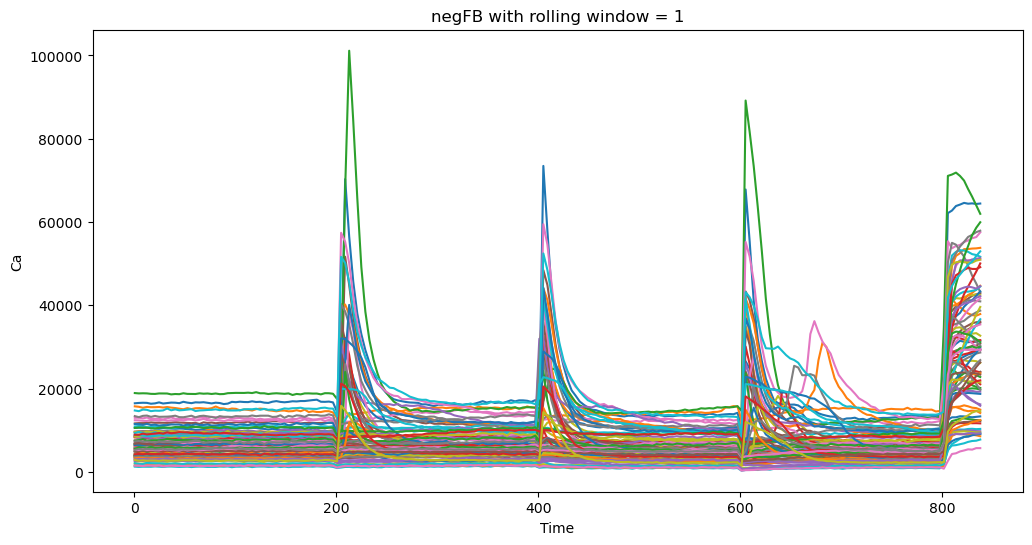

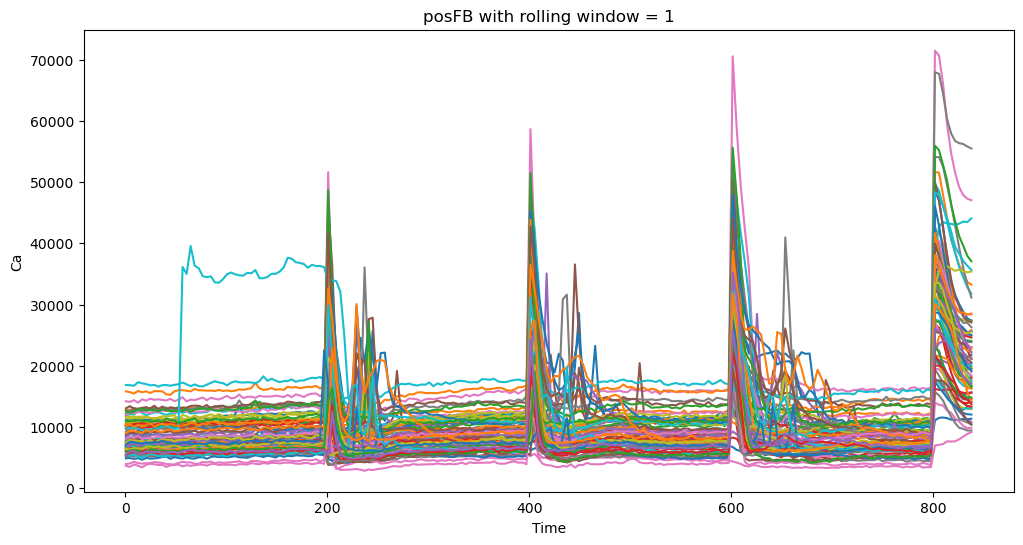

In [18]:
## Plotting normalized data
rolling_window = 1

## Plotting actual data
# negFB
plot_data(negFB, rolling_window, 'negFB')
# posFB
plot_data(posFB, rolling_window, 'posFB')


Then, I plotted the normalized data.

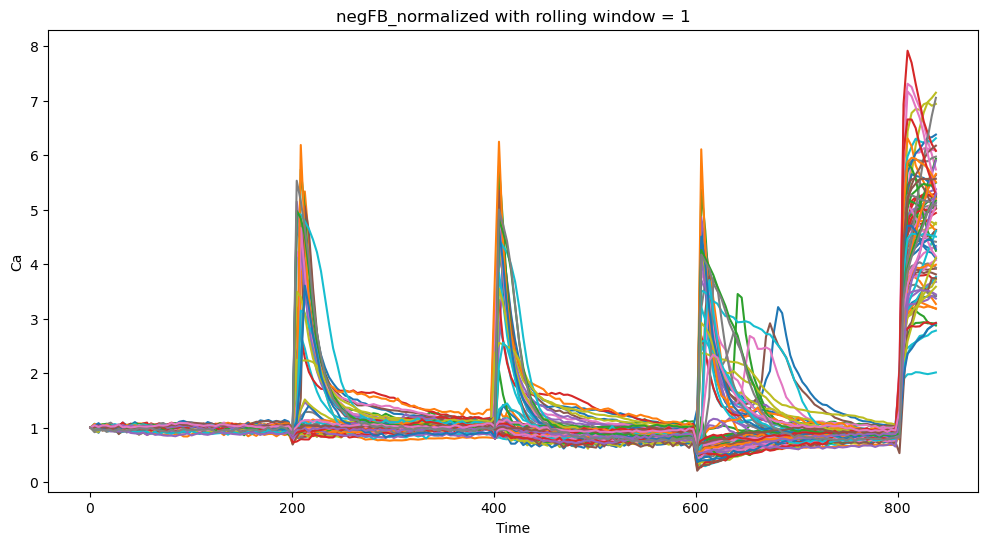

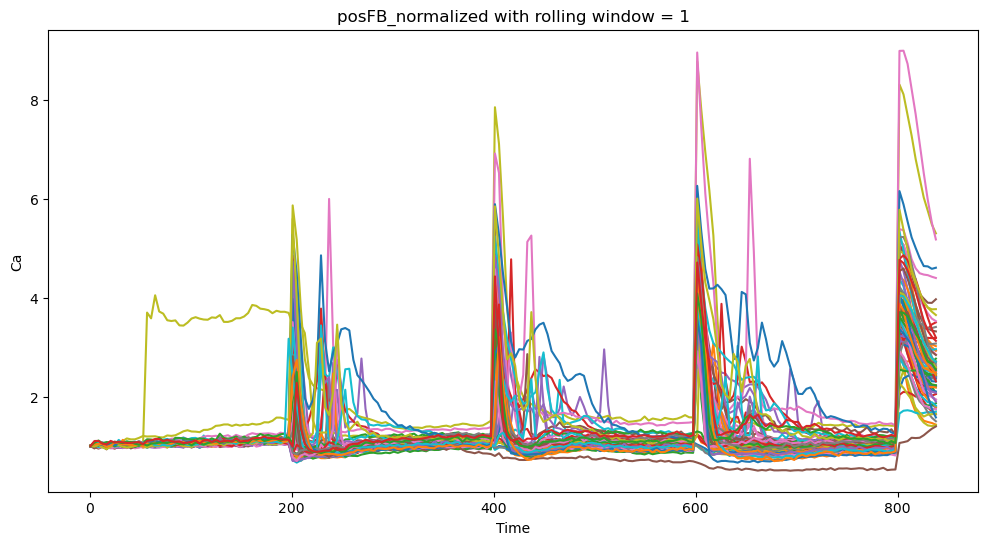

In [19]:
## Plotting normalized data
# negFB
plot_data(negFB_normalized, rolling_window, 'negFB_normalized')
# posFB
plot_data(posFB_normalized, rolling_window, 'posFB_normalized')


Finally, I plotted the percent change data.

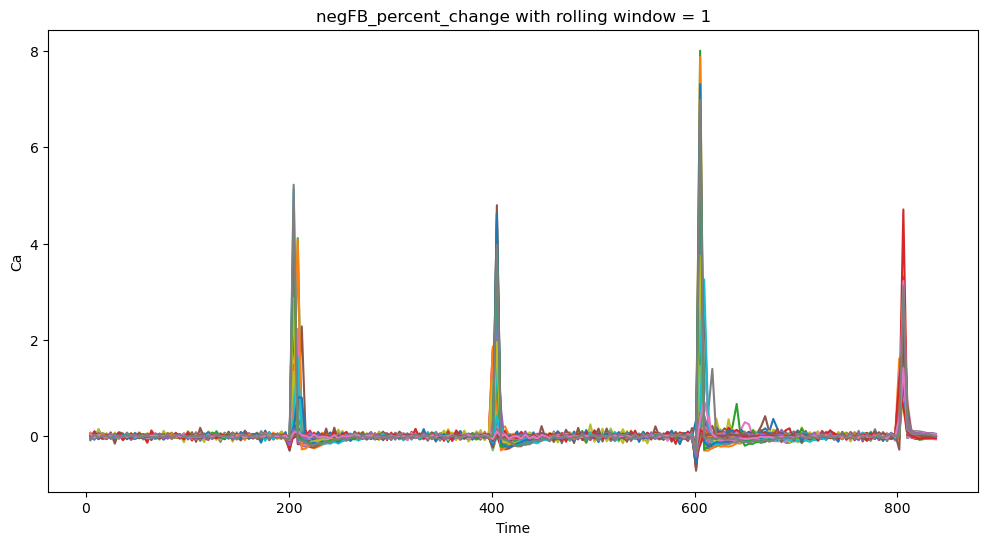

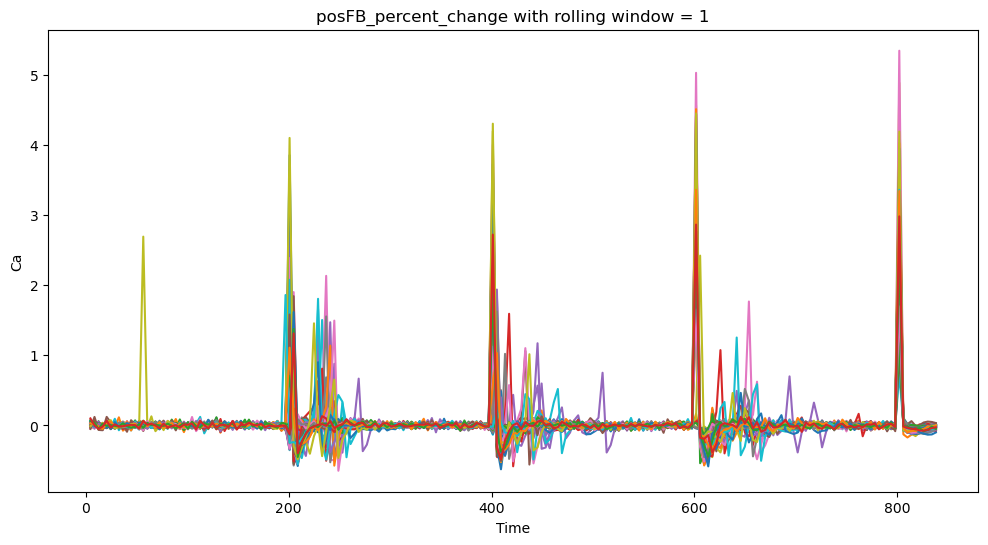

In [27]:
## Plotting percent change
# negFB
plot_data(negFB_pct_change, rolling_window, 'negFB_percent_change')
# posFB
plot_data(posFB_pct_change, rolling_window, 'posFB_percent_change')


In order to compare the two datasets, I defined a new function for plotting the means of the two datasets. The function takes mean along rows, i.e., it calculates a mean value for every timestep. The function inputs are the two dataframes, plot title and a window for rolling average (default value = 1).

In [21]:
def plot_mean(data1, data2, title, rolling_window = 1):
    
    data1 = smooth(data1, rolling_window)
    data2 = smooth(data2, rolling_window)
    
    plt.figure(figsize=(12, 6))
    plt.plot(data1.index, data1.mean(axis=1), label='negFB')
    plt.plot(data2.index, data2.mean(axis=1), label='posFB')
    plt.xlabel('Time')
    plt.ylabel('Ca')
    plt.title(title + ' mean comparison window = '+ str(rolling_window))
    plt.legend(loc = "upper left")
    plt.show()


Then, I plotted the normalized data using the newly defined plot_mean function.

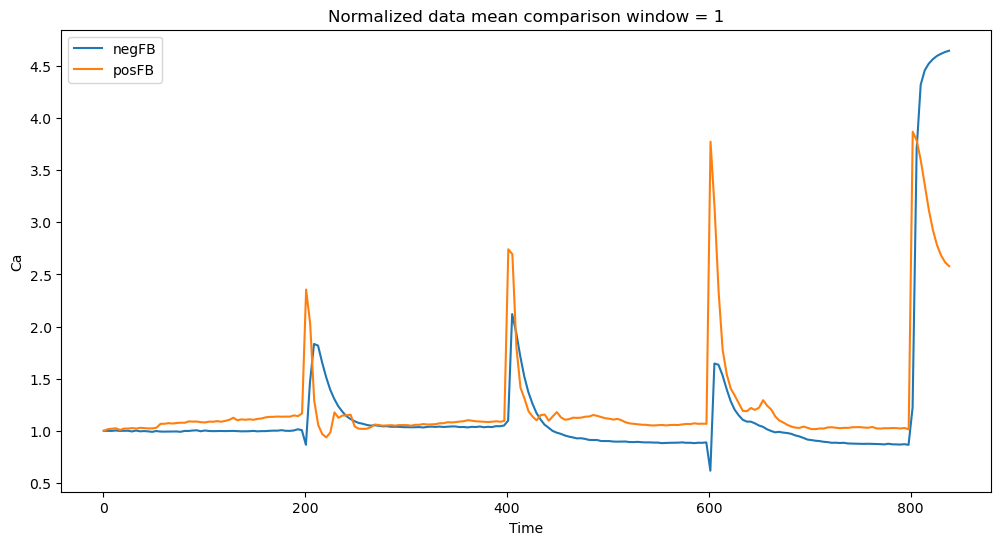

In [22]:
### Plotting the normalized dataframes
rolling_window = 1

plot_mean(negFB_normalized, posFB_normalized, 'Normalized data', rolling_window)


I also plotted the percent change data using the same plot_mean function.

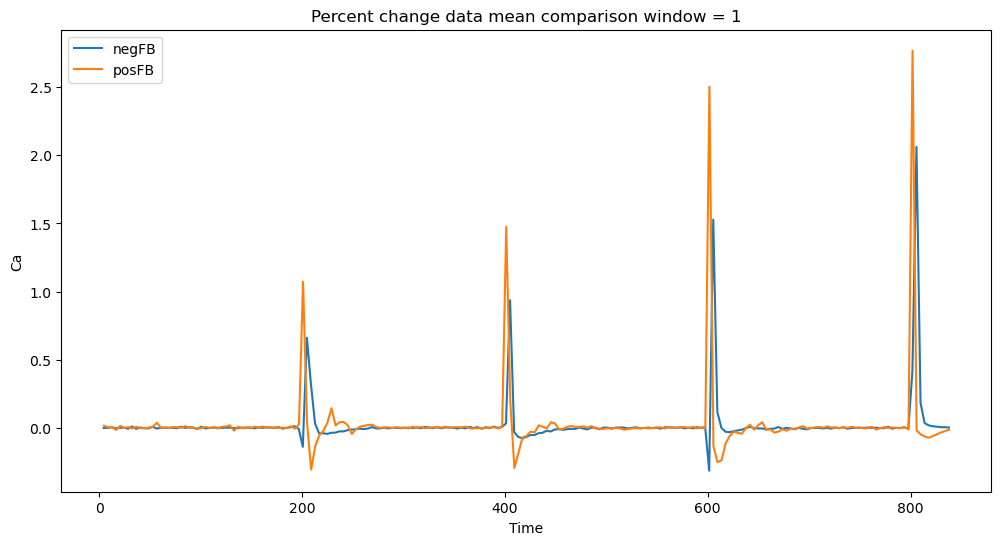

In [28]:
### Plotting the percent change dataframes
rolling_window = 1

plot_mean(negFB_pct_change, posFB_pct_change, 'Percent change data', rolling_window)


1. How do the data in (-F) and (+F) conditions differ?

negFB data has 80 observations, and posFB data has 76 observations. Time range for both data is same.

The normalized data plots show that negFB data have more uniform downslopes at times 200 second and 400 second.

The mean comparison plot of the normalized data shows that the posFB data has greater Ca concentration peaks than the negFB data.

It also shows that peaks kept increasing in magnitude in posFB data. In negFB data, the peak increased in magnitude significantly after time 800.

2. Comparison of negative feedback.

To me, the mean comparison of the normalized data plot indicates that the negFB data has greater negative feedback, resulting in lower Ca concentration peaks.

3. Comparison of positive feedback.
I am not clear about the difference of positive feedback in the two datasets from the plots. The greater Ca concentration in posFB data may indicate that it has greater positive feedback, or it could be the result of lower negative feedback.

4. Comparison of rate of change in upslope and down slopes.
The percent change comparison plot shows that the mean rate of change was much greater for upslopes than downslopes in both posFB and negFB data.


### Questions:

1. It wasn't mentioned what the objects were in the data. There were variation in Ca concentration among the objects within the same dataset. The possible reason for this difference was unclear.

2. There were differences in the four upslope-downslop cycles of the two datasets. In the normalized posFB data, the upslopes kept increasing in magnitude. This wasn't the case in normalized negFB data. The reason for the differences in the datasets was unclear.